In [1]:
#Import packages
import requests
import io
import ast
import math
import urllib.request
import flipp_data_extracter
from PIL import Image
from io import BytesIO
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# Information needed for data extraction
item_name = 'broccoli'
zip_code = 60565

In [3]:
#results list of dictionarys of query items
Output = flipp_data_extracter.search(item_name, zip_code)

In [4]:
display(len(Output))

8

In [5]:
# view dictionary 
Output[0]['item'].items()

dict_items([('id', 543712056), ('flyer_id', 3900410), ('flyer_valid_from', '2021-01-20T01:00:00-05:00'), ('flyer_valid_to', '2021-01-26T23:59:59-05:00'), ('brand', None), ('display_type', 1), ('merchant', 'Fresh Thyme Market'), ('merchant_id', 3552), ('merchant_logo', 'http://images.wishabi.net/merchants/3552/1489510928/medium'), ('name', 'Broccoli Crowns or Green Beans'), ('image_url', 'http://f.wishabi.net/page_items/211859707/1611229930/extra_large.jpg'), ('cutout_image_url', 'http://f.wishabi.net/page_items/211859707/1611229930/extra_large.jpg'), ('media', []), ('description', None), ('current_price', '0.99'), ('current_price_range', None), ('pre_price_text', None), ('category', ''), ('price_text', 'LB'), ('sale_story', None), ('original_price', None), ('original_price_range', None), ('in_store_only', False), ('disclaimer_text', None), ('flyer_disclaimer_text', ''), ('valid_from', None), ('valid_to', None), ('timezone', -300), ('sku', None), ('ttm_label', 'See It'), ('ttm_url', Non

In [6]:
def select_df(list_dics_all):
    '''
    Results a datafram of selected items reading a list of 
    dictionaries of extracted items.
    '''
    #Reading data from Output dictionary
    selected_cols = ['brand', 'merchant', 'name', 'category', 'description', 
                                           'current_price', 'price_text', 'percent_off','image_url','cutout_image_url']
    df_all_items = pd.DataFrame(columns = selected_cols) # dataframe from selected items

    list_dic_selected_items =[]  # list of dictionaries with selected item desriptions only


    for i in range(len(Output)):
        items_dict = Output[i]['item']
        selected_dict = {}

        for key in items_dict:
            if key in selected_cols:
                selected_dict[key] = items_dict[key]                   
        list_dic_selected_items.append(selected_dict)   #update list with dictinaries for each group
    df_all_items = df_all_items.append(list_dic_selected_items, True)   # append list to dataframe 
    return df_all_items

In [7]:
df_sel = select_df(Output)

In [8]:
df_sel.head(20)

,brand,merchant,name,category,description,current_price,price_text,percent_off,image_url,cutout_image_url
0,None,Fresh Thyme Market,Broccoli Crowns or Green Beans,,None,0.99,LB,None,http://f.wishabi.net/page_items/211859707/1611...,http://f.wishabi.net/page_items/211859707/1611...
1,Birds Eye,Walmart,NEW! Birds Eye Cheddar Broccoli Bake,,13 oz,3.98,None,None,http://f.wishabi.net/page_pdf_images/11100085/...,http://f.wishabi.net/page_items/209111486/1609...
2,None,Meijer,Broccoli Crowns*,,None,1.0,each,None,http://f.wishabi.net/page_pdf_images/11207142/...,http://f.wishabi.net/page_items/211304645/1611...
3,None,Meijer,Mann's Broccoli Cole Slaw*,,12 oz.,1.0,each,None,http://f.wishabi.net/page_pdf_images/11207142/...,http://f.wishabi.net/page_items/211304650/1611...
4,None,Mariano's,Broccoli Crowns or Cauliflower,,None,0.99,lb With Card,None,http://f.wishabi.net/page_items/211346486/1610...,http://f.wishabi.net/page_items/211346486/1610...
5,None,Whole Foods,"Organic Baby Broccoli Bunch"" SALE 2 for $5 Re...",,None,,None,None,http://f.wishabi.net/page_items/212368864/1611...,http://f.wishabi.net/page_items/212368864/1611...
6,None,Jewel-Osco,"Kale Breeze, Crunchy Chinese Chicken or Brocco...",,None,5.99,lb.,None,http://f.wishabi.net/page_pdf_images/11232492/...,http://f.wishabi.net/page_items/211645653/1611...
7,None,Whole Foods,Broccoli Crunch Salad* SALE 15% off/lb Regula...,,None,,None,None,http://f.wishabi.net/page_items/212368591/1611...,http://f.wishabi.net/page_items/212368591/1611...


In [9]:
len(df_sel['current_price'])

8

In [10]:
len(df_sel[df_sel['current_price'] == ''])

2

In [11]:
df_sel['ext_price'] = np.nan
df_sel['ext_weight(oz)'] = np.nan

In [12]:
df_sel.tail()

,brand,merchant,name,category,description,current_price,price_text,percent_off,image_url,cutout_image_url,ext_price,ext_weight(oz)
3,None,Meijer,Mann's Broccoli Cole Slaw*,,12 oz.,1.0,each,None,http://f.wishabi.net/page_pdf_images/11207142/...,http://f.wishabi.net/page_items/211304650/1611...,NaN,NaN
4,None,Mariano's,Broccoli Crowns or Cauliflower,,None,0.99,lb With Card,None,http://f.wishabi.net/page_items/211346486/1610...,http://f.wishabi.net/page_items/211346486/1610...,NaN,NaN
5,None,Whole Foods,"Organic Baby Broccoli Bunch"" SALE 2 for $5 Re...",,None,,None,None,http://f.wishabi.net/page_items/212368864/1611...,http://f.wishabi.net/page_items/212368864/1611...,NaN,NaN
6,None,Jewel-Osco,"Kale Breeze, Crunchy Chinese Chicken or Brocco...",,None,5.99,lb.,None,http://f.wishabi.net/page_pdf_images/11232492/...,http://f.wishabi.net/page_items/211645653/1611...,NaN,NaN
7,None,Whole Foods,Broccoli Crunch Salad* SALE 15% off/lb Regula...,,None,,None,None,http://f.wishabi.net/page_items/212368591/1611...,http://f.wishabi.net/page_items/212368591/1611...,NaN,NaN


In [13]:
for i in range(len(df_sel)):
        comb_text = str(df_sel['name'][i])+ ',' + str(df_sel['description'][i]) + ','+  str(df_sel['price_text'][i])
       
      #Extract oz and lb
        tw1 = re.findall(r'(\d*\.?\d+)(\s?|\\n|-|.)(?i)(oz|lb|0z|lbs|fl)', comb_text)    
        tw2 = re.findall(r'(\s?)(?i)(oz|lb)', comb_text)
        
        fwegt = tw1 or tw2 
        #print(i, fwegt,  comb_text)
        if fwegt !=[]:
            wt_num = fwegt[0]  # pick the first one for multitple entries
            if len(wt_num)==3:  # there is numerical value, space and unit lb or oz
                wt_num1 = ast.literal_eval(wt_num[0]) # numerical value
                wt_unt1 = wt_num[2] # unit becasue second would be space
                #print(type(wt_num1),wt_num1, wt_unt1)
                if wt_unt1.lower() == 'lb':  # in order to convert lb to oz
                    #print(type(wt_num1),wt_num1, wt_unt1)
                    if type(wt_num1) == int:
                        if wt_num1 > 0 and wt_num1 <= 9:
                            num_lb = float(wt_num1 * 16.0) 
                            df_sel['ext_weight(oz)'][i] = num_lb
                            #print(wt_num1, wt_unt1, num_lb)
                        else:  # if integer is very large
                            df_sel['ext_weight(oz)'][i] = float(16.0)
                            
                    else:               # either emptly or any other large number or decimal
                        str_num = str(wt_num1)
                        cnt_deci =  str_num[::-1].find('.')
                        if cnt_deci == 1:
                            df_sel['ext_weight(oz)'][i] = float(wt_num1) * 16.0
                        else:
                            df_sel['ext_weight(oz)'][i] = float(16)
                elif wt_unt1.lower() =='oz' or wt_unt1.lower() =='0z' or wt_unt1.lower() =='fl': # in case of oz 
                    num_oz = wt_num1
                    df_sel['ext_weight(oz)'][i] = num_oz   
                                   
            else:  #  either there is space or no space and unit
                wt_num2 = wt_num[0] # numerical value or empty
                wt_unt2 = wt_num[1]  #unit lb or oz
                #print(wt_num2,',', wt_unt2, fwegt)
                if wt_unt2.lower == 'oz': #it oz so just 1#
                    df_sel['ext_weight(oz)'][i] = float(1.0)
                else: # it oz so just 1# if it is lb convert ot oz
                    df_sel['ext_weight(oz)'][i] = float(16.0)                

In [14]:
df_wgt = df_sel.dropna(subset = ['ext_weight(oz)'])

In [15]:
df_sel.shape, df_wgt.shape

((8, 12), (6, 12))

In [16]:
df_wgt['price_text'].unique()

array(['LB', None, 'each', 'lb With Card', 'lb.'], dtype=object)

In [17]:
df_wgti = df_wgt.reset_index() # reindex the dataframe after dropping rows with missing units

In [18]:
df_wgti.head() 

,index,brand,merchant,name,category,description,current_price,price_text,percent_off,image_url,cutout_image_url,ext_price,ext_weight(oz)
0,0,None,Fresh Thyme Market,Broccoli Crowns or Green Beans,,None,0.99,LB,None,http://f.wishabi.net/page_items/211859707/1611...,http://f.wishabi.net/page_items/211859707/1611...,NaN,16.0
1,1,Birds Eye,Walmart,NEW! Birds Eye Cheddar Broccoli Bake,,13 oz,3.98,None,None,http://f.wishabi.net/page_pdf_images/11100085/...,http://f.wishabi.net/page_items/209111486/1609...,NaN,13.0
2,3,None,Meijer,Mann's Broccoli Cole Slaw*,,12 oz.,1.0,each,None,http://f.wishabi.net/page_pdf_images/11207142/...,http://f.wishabi.net/page_items/211304650/1611...,NaN,12.0
3,4,None,Mariano's,Broccoli Crowns or Cauliflower,,None,0.99,lb With Card,None,http://f.wishabi.net/page_items/211346486/1610...,http://f.wishabi.net/page_items/211346486/1610...,NaN,16.0
4,6,None,Jewel-Osco,"Kale Breeze, Crunchy Chinese Chicken or Brocco...",,None,5.99,lb.,None,http://f.wishabi.net/page_pdf_images/11232492/...,http://f.wishabi.net/page_items/211645653/1611...,NaN,16.0


In [19]:
for i in range(len(df_wgti)):
        pr_exrt = str(df_wgti['name'][i])+ ',' + str(df_wgti['description'][i]) + ','+ str(df_wgti['price_text'][i])
       
       
        if df_wgti['current_price'][i] =='':  # if price is missing in current price
            #print(i, pr_exrt)
            pxt1 =  re.findall(r'([$])(\d+(\.?)\d+)', pr_exrt)
            pxt2 =  re.findall(r'(\d+)(\s|\\n)(\d+)(\s?|\\n)(?i)(lb|lbs|oz|ea)', pr_exrt)
            pxt3 =  re.findall(r' (?i)(lb|lbs|lb.)(\s?|\\n|.)(\d+)[(.|\\n|\s?)](\d+)', pr_exrt)
            pxt4 =  re.findall(r'(?i)(Lb|Lbs|lb.)(\s?|.|\\n)(\d+)', pr_exrt)
            pxt5 =  re.findall(r'(\d+(\s?\.?)\d+)(\s?|\\n|.)(?i)(lb|lbs|\xa2|ea)', pr_exrt)
            pxt6 =  re.findall(r'(\d+)(\s?|\\n)(?i)(ea)', pr_exrt)
            
            fpxt = pxt1 or pxt2 or pxt3 or pxt4 or pxt5 or pxt6
            #print(i, fpxt, pr_exrt)    
            if fpxt !=[]:
                ext_itm = fpxt[0]  # pick the first one for multitple entries
                #print(i, fpxt[0])
                #clean data with $ in the front
                
                #print(i, fpxt, pr_exrt) 
                if ext_itm[0] == "$":
                    ext_val1 = ast.literal_eval(ext_itm[1]) # numerical value int or float
                    #print(i, ext_val1, pr_exrt)
                    if type(ext_val1) == float:
                        #print(i, ext_val1, pr_exrt)
                        df_wgti['ext_price'][i]= ext_val1
                    elif type(ext_val1) != float:
                       # print(i, ext_val1, pr_exrt)
                        df_wgti['ext_price'][i]= ext_val1/100   
                         #print(i, ext_val1, pr_exrt)
                if ext_itm[-1].lower() == 'lb':
                    #print(i, ext_itm) 
                    ext_lb0 = ast.literal_eval(ext_itm[0])
                    if len(ext_itm[0]) !=1:
                        if type(ext_lb0) == float:
                            df_wgti['ext_price'][i]=ext_lb0
                        elif len(ext_itm[0]) == 4:
                            df_wgti['ext_price'][i]=ext_lb0/1000
                            #print(i, ext_lb0)   
                        elif len(ext_itm[0]) == 3 or len(ext_itm[0])==2:
                            df_wgti['ext_price'][i]=ext_lb0/100
                           # print(i, ext_lb0) 
                    elif len(ext_itm[0])==1:  
                        n_ext = ext_itm[0] +''+'99'
                        df_wgti['ext_price'][i]=(ast.literal_eval(n_ext))/100
                        #print(i, ext_lb0) 
                        #print(ext_itm[0],ast.literal_eval(n_ext), pr_exrt)
                elif ext_itm[0].lower() =='lb' or ext_itm[0].lower() =='lb.':
                    #print(i, ext_itm[0], ext_itm[2], pr_exrt)
                    df_wgti['ext_price'][i]=(ast.literal_eval(ext_itm[2]))/100 
                elif ext_itm[-1].lower() != 'lb' and ext_itm[0] != "$":
                    if len(ext_itm[0])==2 or len(ext_itm[0]) == 3:
                        df_wgti['ext_price'][i]=(ast.literal_eval(ext_itm[0]))/100
                    else:
                        df_wgti['ext_price'][i]=np.nan     
            else:
                df_wgti['ext_price'][i] = np.nan

In [20]:
df_wgti['ext_price'].unique()

array([nan])

In [21]:
df_wgti['ext_price'].isnull().sum() 

6

In [22]:
df_wgti['ext_weight(oz)'].unique()

array([16., 13., 12.])

In [23]:
type(df_wgti['ext_weight(oz)'])

pandas.core.series.Series

In [24]:
df_wgti['ext_weight(oz)'].isnull().sum()

0

In [25]:
df_np = df_wgti[['merchant','current_price','percent_off', 'image_url','ext_price', 'ext_weight(oz)']].copy()

In [26]:
df_np.head()

,merchant,current_price,percent_off,image_url,ext_price,ext_weight(oz)
0,Fresh Thyme Market,0.99,None,http://f.wishabi.net/page_items/211859707/1611...,NaN,16.0
1,Walmart,3.98,None,http://f.wishabi.net/page_pdf_images/11100085/...,NaN,13.0
2,Meijer,1.0,None,http://f.wishabi.net/page_pdf_images/11207142/...,NaN,12.0
3,Mariano's,0.99,None,http://f.wishabi.net/page_items/211346486/1610...,NaN,16.0
4,Jewel-Osco,5.99,None,http://f.wishabi.net/page_pdf_images/11232492/...,NaN,16.0


In [27]:
df_np['com_price'] = np.nan

In [28]:
# create a new column using current and extracted price
for i in range(len(df_np)):
    old_price = df_np['current_price'][i]
    new_price = df_np['ext_price'][i]
    if old_price != '':
        df_np['com_price'][i] = old_price
    else:
        df_np['com_price'][i] = new_price        

In [29]:
# remove missing values if any from new column
df_final = df_np.dropna(subset = ['com_price'])

In [30]:
df_final = df_final.reset_index(drop= True)

In [31]:
df_np.shape, df_final.shape

((6, 7), (5, 7))

In [32]:
df_final.head()

,merchant,current_price,percent_off,image_url,ext_price,ext_weight(oz),com_price
0,Fresh Thyme Market,0.99,None,http://f.wishabi.net/page_items/211859707/1611...,NaN,16.0,0.99
1,Walmart,3.98,None,http://f.wishabi.net/page_pdf_images/11100085/...,NaN,13.0,3.98
2,Meijer,1.0,None,http://f.wishabi.net/page_pdf_images/11207142/...,NaN,12.0,1.00
3,Mariano's,0.99,None,http://f.wishabi.net/page_items/211346486/1610...,NaN,16.0,0.99
4,Jewel-Osco,5.99,None,http://f.wishabi.net/page_pdf_images/11232492/...,NaN,16.0,5.99


In [33]:
df_final['final_price($/oz)'] = np.nan

In [34]:
for i in range(len(df_final)):
    pr_indoll = df_final['com_price'][i]
    unit_inoz = df_final['ext_weight(oz)'][i]
    df_final['final_price($/oz)'][i] = round((pr_indoll/unit_inoz),3)        

In [35]:
 df_final['final_price($/oz)'].unique()

array([0.062, 0.306, 0.083, 0.374])

In [36]:
df_final.head()

,merchant,current_price,percent_off,image_url,ext_price,ext_weight(oz),com_price,final_price($/oz)
0,Fresh Thyme Market,0.99,None,http://f.wishabi.net/page_items/211859707/1611...,NaN,16.0,0.99,0.062
1,Walmart,3.98,None,http://f.wishabi.net/page_pdf_images/11100085/...,NaN,13.0,3.98,0.306
2,Meijer,1.0,None,http://f.wishabi.net/page_pdf_images/11207142/...,NaN,12.0,1.00,0.083
3,Mariano's,0.99,None,http://f.wishabi.net/page_items/211346486/1610...,NaN,16.0,0.99,0.062
4,Jewel-Osco,5.99,None,http://f.wishabi.net/page_pdf_images/11232492/...,NaN,16.0,5.99,0.374


'Fresh Thyme Market'

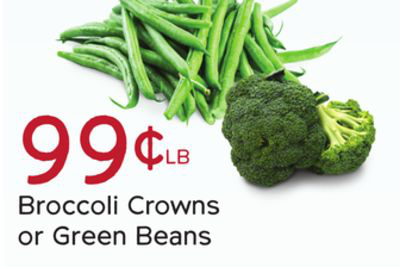

"Mariano's"

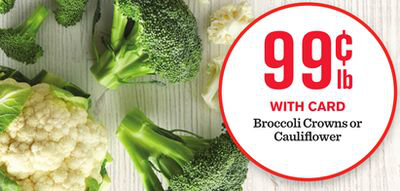

'Meijer'

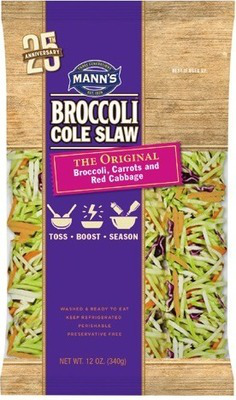

'Walmart'

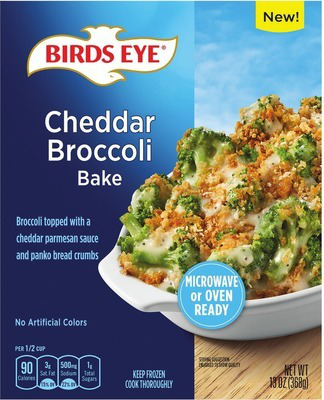

'Jewel-Osco'

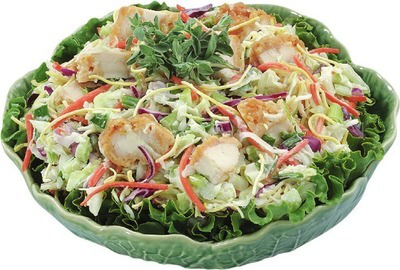

In [37]:
def sort_display(df_name):
    '''
    Returns five lowest price 
    items from the dataframe.
    '''
    df_sorted = df_name.sort_values(by='final_price($/oz)')
    df_sorted = df_sorted.reset_index()
    
    if len(df_sorted) < 5:
        for i in range(len(df_sorted)):
            store_name = df_sorted['merchant'][i]
            final_price = df_sorted['final_price($/oz)'][i]
            item_image = df_sorted['image_url'][i]
            #read the image
            with urllib.request.urlopen(item_image ) as url:
                ff = io.BytesIO(url.read())
                img = Image.open(ff)
                display(store_name,img)
    else:
        for i in range(len(df_sorted)):
            if i < 5:
                store_name = df_sorted['merchant'][i]
                final_price = df_sorted['final_price($/oz)'][i]
                item_image = df_sorted['image_url'][i]
                #read the image
                with urllib.request.urlopen(item_image ) as url:
                    ff = io.BytesIO(url.read())
                    img = Image.open(ff)
                    display(store_name,img)
 
    return 
sort_display(df_final)

In [38]:
def sorted_bestprice(df_final):
    df_sorted = df_final.sort_values(by='final_price($/oz)')
    df_sorted = df_sorted.reset_index()

    bp_list = [] #list of tuples with best price store name, best price and image url

    if len(df_sorted) <5:
        for i in range(len(df_sorted)):
            store_name = df_sorted['merchant'][i]
            final_price = df_sorted['final_price($/oz)'][i]
            item_image = df_sorted['image_url'][i]
            bp_list.append((store_name, final_price, item_image))
    else:
        for i in range(len(df_sorted)):
            if i < 5:
                store_name = df_sorted['merchant'][i]
                final_price = df_sorted['final_price($/oz)'][i]
                item_image = df_sorted['image_url'][i]
                bp_list.append((store_name, str(final_price) +'/oz', item_image))
    return bp_list

print(len(sorted_bestprice(df_final)))    
print(sorted_bestprice(df_final)) 

5
[('Fresh Thyme Market', '0.062/oz', 'http://f.wishabi.net/page_items/211859707/1611229930/extra_large.jpg'), ("Mariano's", '0.062/oz', 'http://f.wishabi.net/page_items/211346486/1610722104/extra_large.jpg'), ('Meijer', '0.083/oz', 'http://f.wishabi.net/page_pdf_images/11207142/ad6a09c8-502e-11eb-9269-0e7faade0358/x_large'), ('Walmart', '0.306/oz', 'http://f.wishabi.net/page_pdf_images/11100085/16ae435e-3bf3-11eb-af2b-0e1ba86a8db4/x_large'), ('Jewel-Osco', '0.374/oz', 'http://f.wishabi.net/page_pdf_images/11232492/e17df3c2-551b-11eb-bc03-0ec6e2beadde/x_large')]
